# Arbre de decision

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
data = {
    'Sepal Length': [5.3, 4.9, 4.5, 5.4, 5.3, 5.8],
    'Petal Width': [0.9, 0.5, 1.4, 1.5, 1.9, 1.8],
    'Setosa': [1, 1, 1, 0, 0, 0]
}

df = pd.DataFrame(data)

X = df[['Sepal Length', 'Petal Width']]  # Features
y = df['Setosa']

In [3]:
tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf.fit(X, y)

DecisionTreeClassifier()

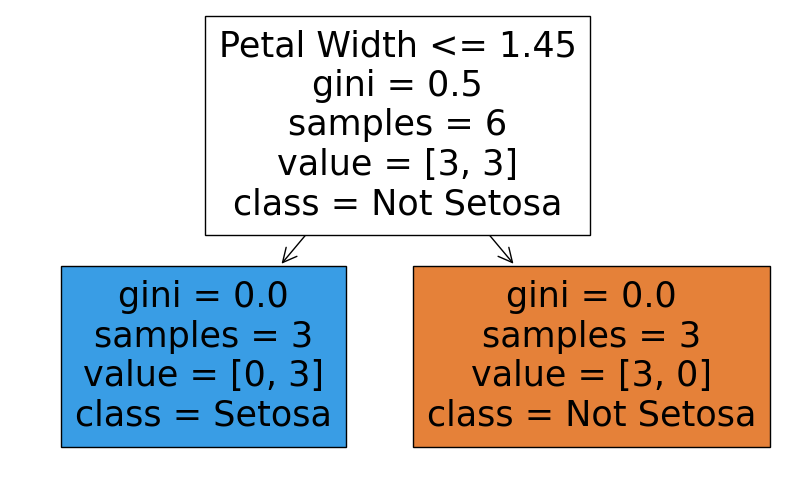

In [4]:
plt.figure(figsize=(10,6))
plot_tree(tree_clf, feature_names=["Sepal Length", "Petal Width"], class_names=["Not Setosa", "Setosa"], filled=True)
plt.show()

In [5]:
new_data = np.array([[3.8, 0.8], [4.5, 0.3], [4.9, 0.4], [4.8, 1.5]])
prediction = tree_clf.predict(new_data)
for i in range(new_data.shape[0]):
    print(f"Precision for new data: {i}", "Setosa" if prediction[i] == 1 else "Not Setosa")

Precision for new data: 0 Setosa
Precision for new data: 1 Setosa
Precision for new data: 2 Setosa
Precision for new data: 3 Not Setosa


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Foret Aleatoire

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X_iris = iris.data[["sepal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.5, random_state=42)

## Arbre de decision

In [7]:
decision_tree_clf = DecisionTreeClassifier(criterion="gini")
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

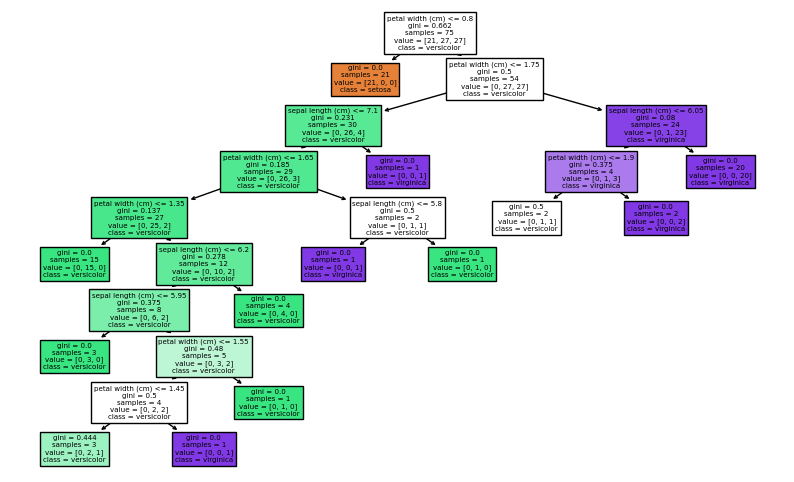

In [8]:
plt.figure(figsize=(10,6))
plot_tree(decision_tree_clf, feature_names=["sepal length (cm)", "petal width (cm)"], class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = decision_tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

0.92
0.9198484848484848


array([[29,  0,  0],
       [ 0, 21,  2],
       [ 0,  4, 19]], dtype=int64)

## Foret Aleatoire

In [10]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(random_state=42)
random_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred_1 = random_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_1))
print(f1_score(y_test, y_pred_1, average='weighted'))
confusion_matrix(y_test, y_pred_1)

0.9733333333333334
0.9733333333333334


array([[29,  0,  0],
       [ 0, 22,  1],
       [ 0,  1, 22]], dtype=int64)

## Fine Tune the hyperparameters using Grid Search in the Random Forest

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': list(range(50, 100)),
    'max_depth': list(range(2, 5)),
    'min_samples_split': [2, 3, 4, 5]
}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60, 61, 62, 63, 64, 65, 66, 67,
                                          68, 69, 70, 71, 72, 73, 74, 75, 76,
                                          77, 78, 79, ...]})

In [13]:
grid_search_cv.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=71,
                       random_state=42)

In [14]:
y_pred_1_fine_tune = grid_search_cv.predict(X_test)
print(accuracy_score(y_test, y_pred_1_fine_tune))
print(f1_score(y_test, y_pred_1_fine_tune, average='weighted'))
confusion_matrix(y_test, y_pred_1_fine_tune)

0.9866666666666667
0.9866603624901497


array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]], dtype=int64)

# AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [17]:
y_pred_2 = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_2))
print(f1_score(y_test, y_pred_2, average='weighted'))
confusion_matrix(y_test, y_pred_2)

0.9866666666666667
0.9866603624901497


array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]], dtype=int64)